In [1]:
# Importing libraries for data manipulation and data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Suppressing warnings.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Importing data

In [2]:
# Simply importing the dataset and inspecting it.
lead = pd.read_csv("Leads.csv")
pd.set_option('display.max_columns', None)
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [3]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Data Preparation

In [5]:
# Let's check the missing values.
round(lead.isnull().sum()/lead.shape[0], 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.01
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.01
Last Activity                                    0.01
Country                                          0.27
Specialization                                   0.16
How did you hear about X Education               0.24
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

In [6]:
# Before doing anything else, let's just convert all the Yes/No variables to 1/0 for convenience.
for feature in ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'
               , 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content'
                , 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'] :
    lead[feature] = lead[feature].apply(lambda x : 1 if x == 'Yes' else 0)
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [7]:
# Let's just convert all the 'Select' variable into NaN since select basically means that the user just didn't choose any options from the list.
lead = lead.replace('Select', np.nan)

In [8]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [9]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Check missing value percentages.
round(lead.isnull().sum() * 100 / len(lead), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Dropping all columns that have more than 70% null values.
threshold = 0.70
lead = lead.loc[:, round(lead.isnull().sum() / lead.shape[0], 2) <= threshold]
round(lead.isnull().sum() * 100 / len(lead), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                  0                          0     NaN   
1                                  0                          0     NaN   
2                                  0                          0  Mumbai   
3                                  0                          0  Mumbai   
4                                  0                          0  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.

In [13]:
lead['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [14]:
lead['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

In [15]:
lead['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [16]:
lead['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

__Note:__ Upon inspecting, the columns ('Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score') have too many variations.So we will be dropping these columns.

In [17]:
lead = lead.drop(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score'
                  , 'Asymmetrique Profile Score'], axis = 1)

In [18]:
# Inspecting some columns.
lead[['Lead Quality', 'City', 'Specialization', 'Tags', 'What matters most to you in choosing a course'
      , 'What is your current occupation', 'Country']].head(10)

Lead Quality               City           Specialization  \
0  Low in Relevance                NaN                      NaN   
1               NaN                NaN                      NaN   
2          Might be             Mumbai  Business Administration   
3          Not Sure             Mumbai    Media and Advertising   
4          Might be             Mumbai                      NaN   
5               NaN                NaN                      NaN   
6  Low in Relevance             Mumbai  Supply Chain Management   
7               NaN                NaN                      NaN   
8               NaN  Thane & Outskirts   IT Projects Management   
9               NaN             Mumbai       Finance Management   

                                  Tags  \
0          Interested in other courses   
1                              Ringing   
2  Will revert after reading the email   
3                              Ringing   
4  Will revert after reading the email   
5                                  NaN   
6  Will revert after reading the email   
7                                  NaN   
8                                  NaN   
9                                  NaN   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   
5                                           NaN   
6                       Better Career Prospects   
7                                           NaN   
8                                           NaN   
9                                           NaN   

  What is your current occupation Country  
0                      Unemployed     NaN  
1                      Unemployed   India  
2                         Student   India  
3                      Unemployed   India  
4                      Unemployed   India  
5                             NaN     NaN  
6                      Unemployed   India  
7                             NaN     NaN  
8                             NaN   India  
9                             NaN   India

In [19]:
# Converting NaN into 'Not Sure' as Lead Quality mostly depends on employee.
lead['Lead Quality'] = lead['Lead Quality'].replace(np.nan, 'Not Sure')


# Converting all NaNs to Mumbai since most of the values belong to Mumbai.
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')


# There's not much difference in Specializations so converting NaNs into 'Other Specialization'.
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Other Specialization')


# A significant portion of the categories was 'Will revert after reading the email', so converting into this from all NaNs.
lead['Tags'] = lead['Tags'].replace(np.nan, 'Will revert after reading the email')


# 'Better Career Prospects' has a large portion and also is a safer choice.
lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')


# Large portion of the values were 'Unemployed', so imputing null values into these.
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')


# Majority of the data is of 'India' so imputing NaNs into this value.
lead['Country'] = lead['Country'].replace(np.nan, 'India')

In [20]:
# Inspecting null value percentages again.
round(lead.isnull().sum() * 100 / len(lead), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [21]:
# Since the null value percentages are very low(below 2%), we'll drop them.
lead = lead.dropna()
round(lead.isnull().sum() * 100 / len(lead), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [22]:
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization What is your current occupation  \
0   India     Other Specialization                      Unemployed   
1   India     Other Specialization                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India     Other Specialization                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content    City  \
0                                  0                          0  Mumbai   
1                                  0                          0  Mumbai   
2                                  0                          0  Mumbai   
3                                  0                          0  Mumbai   
4                                  0                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                   

### We'll be doing some sub-category cleanups for better Data Analysis.

In [23]:
lead['Do Not Email'].value_counts()

Do Not Email
0    8358
1     716
Name: count, dtype: int64

In [24]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [25]:
# Check if there's data imbalance or not.
lead['Converted'].value_counts(normalize = True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

In [26]:
lead['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [27]:
# Clubbing minor categories into 'Other Activity'.
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'Email Received'
                                                      , 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'], 'Other Activity')

lead['Last Activity'].value_counts()

Last Activity
Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other Activity                 42
Name: count, dtype: int64

In [28]:
lead['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [29]:
lead['Tags'].value_counts()

Tags
Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to O

In [30]:
# Clubbing minor categories into 'Other_Tags'.
lead['Tags'] = lead['Tags'].replace(['opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 'Lateral student'
                                    , 'Want to take admission but has financial problems', 'In confusion whether part time or DLP', 'Interested in Next batch'
                                    , 'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)'], 'Other_Tags')

lead['Tags'].value_counts()

Tags
Will revert after reading the email    5343
Ringing                                1187
Interested in other courses             509
Already a student                       465
Closed by Horizzon                      301
switched off                            240
Busy                                    185
Lost to EINS                            172
Not doing further education             145
Interested  in full time MBA            116
Graduation in progress                  111
Other_Tags                              107
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Name: count, dtype: int64

# Exploratory Data Analysis

In [31]:
lead['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

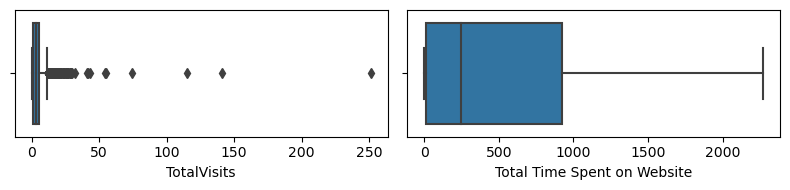

In [32]:
# Plotting a boxplot on 'TotalVisits'
fig, axes = plt.subplots(ncols=2, figsize=(8, 2))

sns.boxplot(x='TotalVisits', data=lead, ax=axes[0])
sns.boxplot(x='Total Time Spent on Website', data=lead, ax=axes[1])
plt.tight_layout()

In [33]:
# There are a lot of outliers present. So we'll be capping at 95th percentile(Another simple way of doing this is use(showfliers = False) in boxplot function).
q1 = lead['TotalVisits'].quantile(0.95)
lead.loc[lead['TotalVisits'] >= q1, 'TotalVisits'] = q1

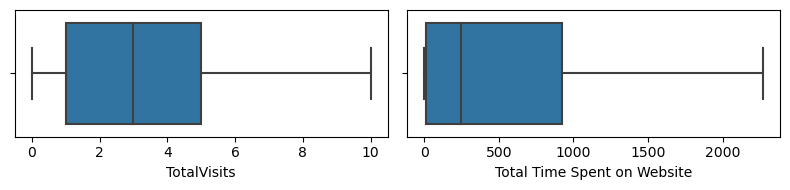

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 2))

sns.boxplot(x='TotalVisits', data=lead, ax=axes[0])
sns.boxplot(x='Total Time Spent on Website', data=lead, ax=axes[1])
plt.tight_layout()


> Users who spend more time on the platform are likely to get converted. Which means the platform should be made to look more appealing for users.

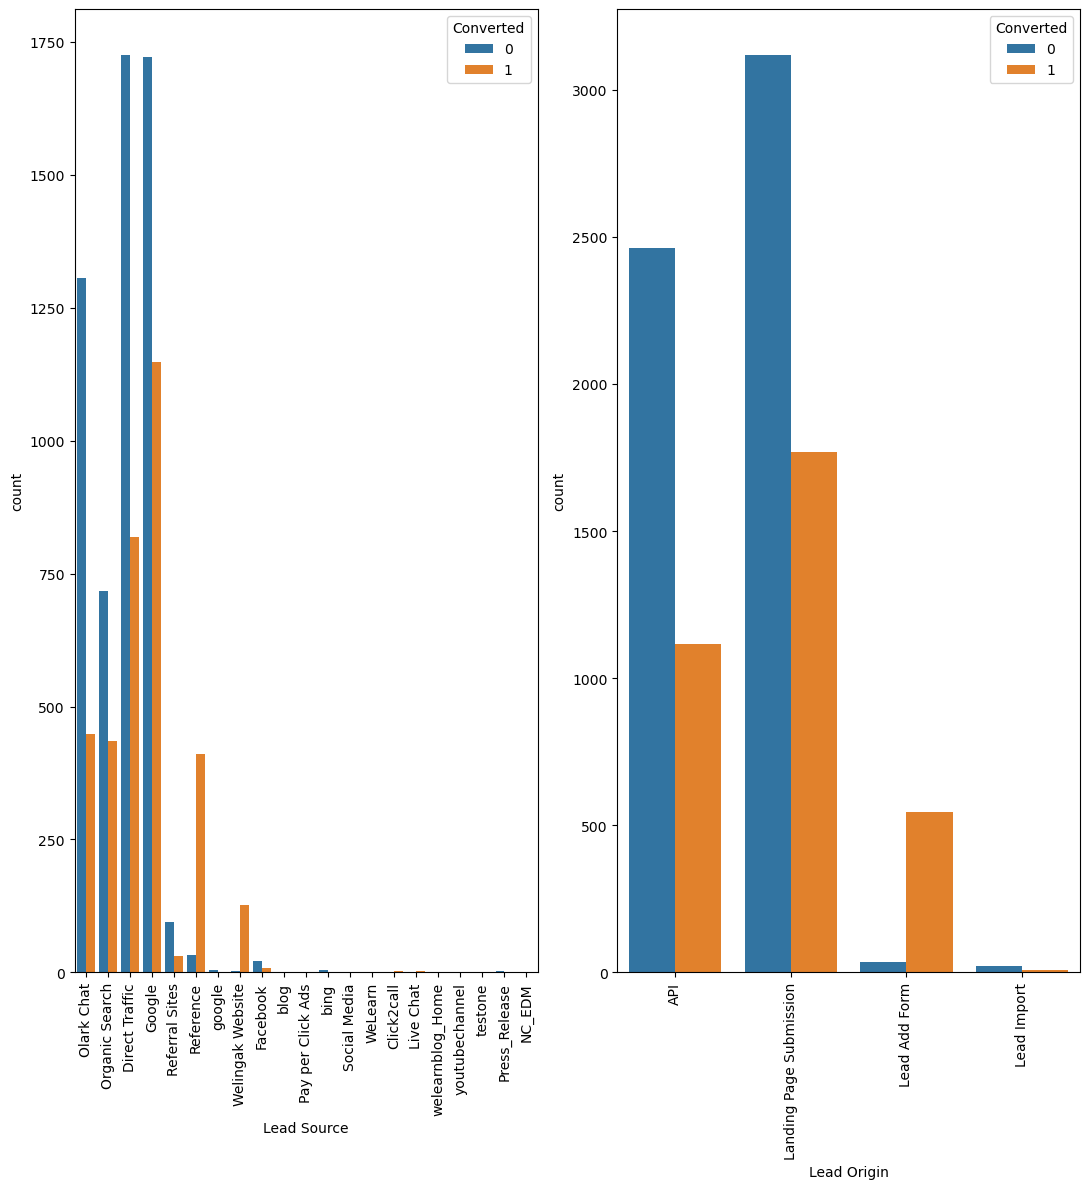

In [35]:
fig, axes = plt.subplots(ncols = 2, figsize=(11, 12))

sns.countplot(x='Lead Source', hue='Converted', data=lead, ax=axes[0])
sns.countplot(x='Lead Origin', hue='Converted', data=lead, ax=axes[1])

for ax in axes:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()


In [36]:
# Clubbing minor categories into 'Other Lead Sources' and 'google' into 'Google'.
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media'
                                                  , 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Lead Sources')

lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

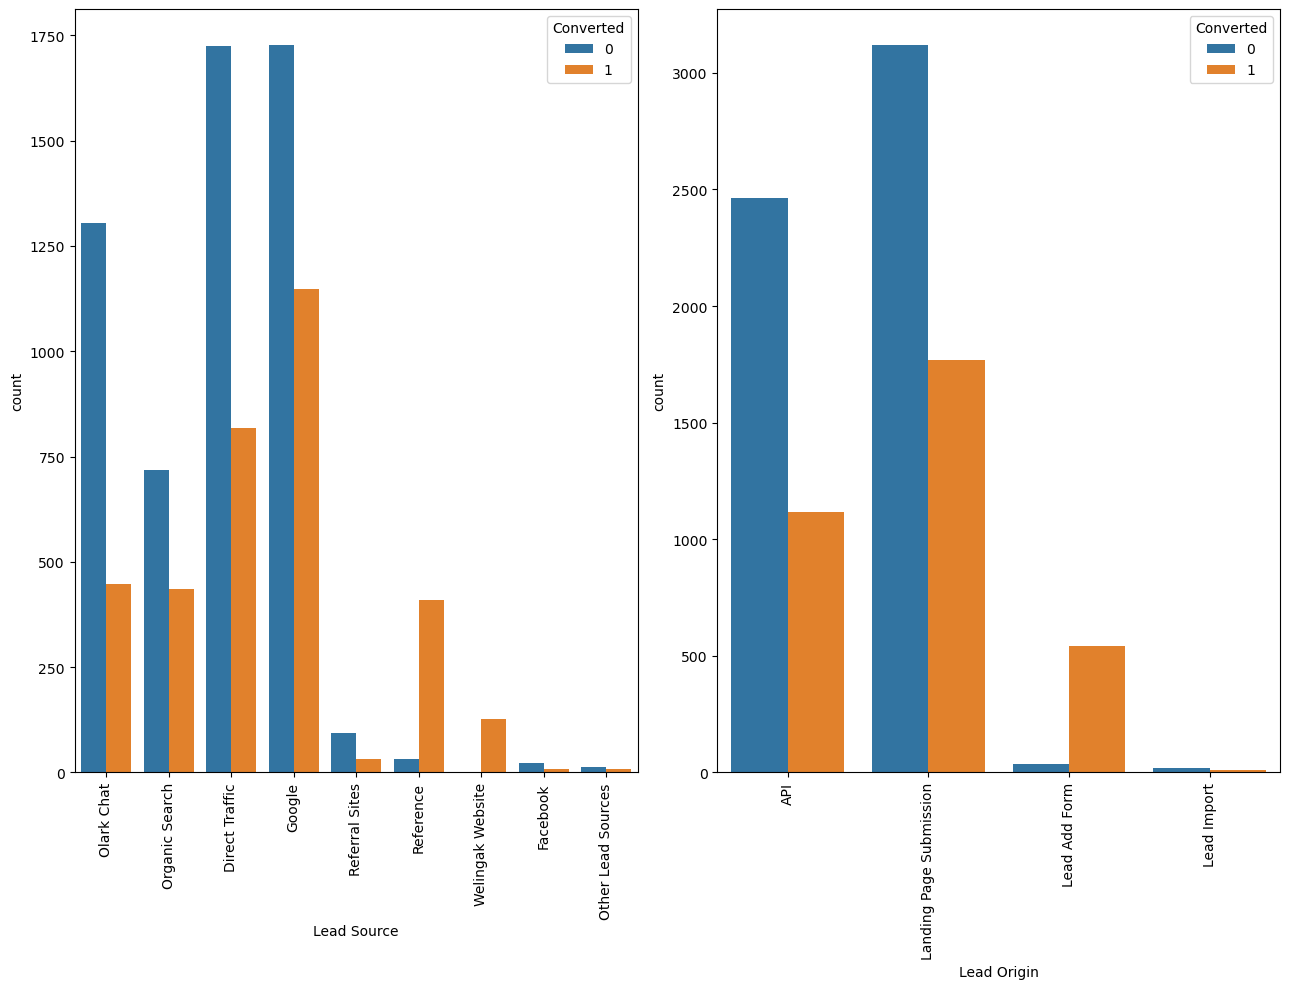

In [37]:
fig, axes = plt.subplots(ncols = 2, figsize=(13, 10))

sns.countplot(x='Lead Source', hue='Converted', data=lead, ax=axes[0])
sns.countplot(x='Lead Origin', hue='Converted', data=lead, ax=axes[1])

for ax in axes:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()


**OBSERVATION:**
   > - `Landing Page Submission` and `API` have high count but moderate conversion rate.
   > - The same goes for `Google` and `Direct Traffic`.

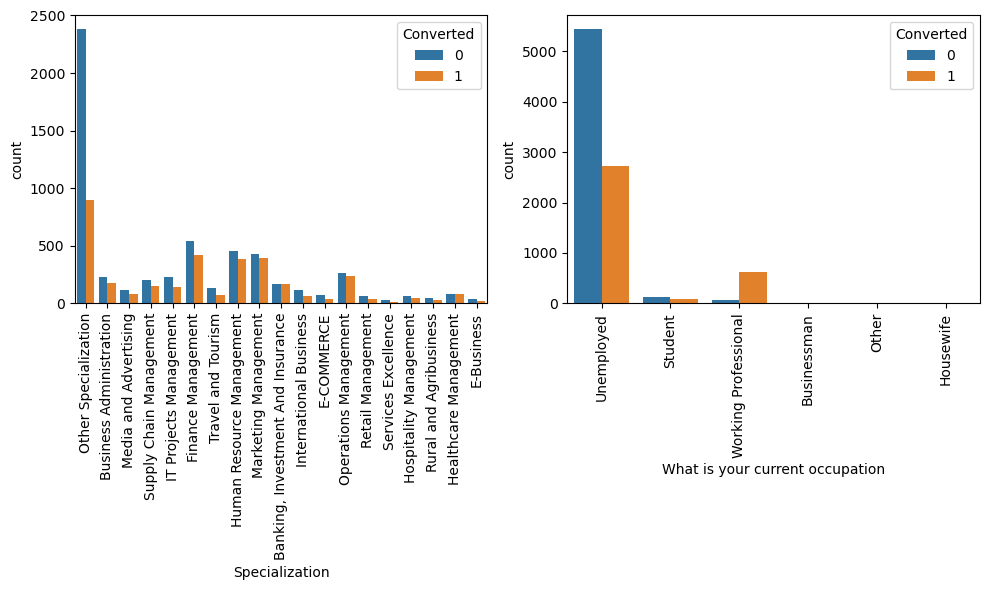

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 6))

sns.countplot(x='Specialization', hue='Converted', data=lead, ax=axes[0])
sns.countplot(x='What is your current occupation', hue='Converted', data=lead, ax=axes[1])

for ax in axes:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout()


**OBSERVATION:**

  > - Counts on `Other Specialization` are quite high but have moderate conversion rate.
  > - The same can be said about `Unemployed`.

In [39]:
lead[['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'
     , 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'
     , 'A free copy of Mastering The Interview']].describe()

Search  Magazine  Newspaper Article  X Education Forums  \
count  9074.000000    9074.0        9074.000000         9074.000000   
mean      0.001543       0.0           0.000220            0.000110   
std       0.039251       0.0           0.014845            0.010498   
min       0.000000       0.0           0.000000            0.000000   
25%       0.000000       0.0           0.000000            0.000000   
50%       0.000000       0.0           0.000000            0.000000   
75%       0.000000       0.0           0.000000            0.000000   
max       1.000000       0.0           1.000000            1.000000   

         Newspaper  Digital Advertisement  Through Recommendations  \
count  9074.000000            9074.000000              9074.000000   
mean      0.000110               0.000441                 0.000771   
std       0.010498               0.020992                 0.027766   
min       0.000000               0.000000                 0.000000   
25%       0.000000               0.000000                 0.000000   
50%       0.000000               0.000000                 0.000000   
75%       0.000000               0.000000                 0.000000   
max       1.000000               1.000000                 1.000000   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

**NOTE:** The above categories have no significance therefore will be dropped.

In [40]:
lead = lead.drop(['Lead Number', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums'
                 , 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content'
                  , 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Country', 'Do Not Call'], axis = 1)

lead.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other Specialization                      Unemployed   
1     Other Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other Specialization                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

## Dummy Variable Creation

In [41]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags'
                            , 'Lead Quality', 'City', 'Last Notable Activity']], drop_first = True).astype(int)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other Lead Sources  Lead Source_Reference  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Last Activity_Unreachable  Last Activity_Unsubscribed  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          1                           0   
4                          0                           0   

   

In [42]:
lead = lead.drop(['Prospect ID','Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality'
                 , 'City', 'Last Notable Activity'], axis = 1)

In [43]:
lead.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  
0                   0.0  
1                   2.5  
2                   2.0  
3                   1.0  
4                   1.0

In [44]:
# Merge the dummy with the main dataframe.
lead = pd.concat([lead, dummy], axis = 1)
lead.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other Lead Sources  Lead Source_Reference  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2   

## Train-Test Split

In [45]:
# Importing libraries required for model building.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Importing libraries required for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [46]:
# Putting feature variables to X.
X = lead.drop(['Converted'], axis = 1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Source_Facebook  \
0                          0                        0                     0   
1                          0                        0                     0   
2                          0                        0                     0   
3                          0                        0                     0   
4                          0                        0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Other Lead Sources  Lead Source_Reference  \
0                               0                      0   
1                               0                      0   
2                               0                      0   
3                               0                      0   
4                               0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
0                                      0                             0   
1                                      0                             0   
2                                      0                             0   
3                                      0                             0   
4                                      0                             0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3 

In [47]:
# Putting response variables to y.
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data into train-set and test-set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Scaling

In [49]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009             0    -0.432779                    -0.160255   
1012             1    -0.432779                    -0.540048   
9226             0    -1.150329                    -0.888650   
4750             0    -0.432779                     1.643304   
7987             0     0.643547                     2.017593   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3009             -0.179666                                    1   
1012             -0.179666                                    1   
9226             -1.132538                                    0   
4750             -0.179666                                    1   
7987              0.058552                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
3009                          0                        0   
1012                          0                        0   
9226                          0                        0   
4750                          0                        0   
7987                          0                        0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
3009                     0                   0                       0   
1012                     0                   0                       0   
9226                     0                   0                       1   
4750                     0                   0                       0   
7987                     0                   0                       0   

      Lead Source_Organic Search  Lead Source_Other Lead Sources  \
3009                           0                               0   
1012                           0                               0   
9226                           0                               0   
4750                           0                               0   
7987                           0                               0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
3009                             0                            0   
1012                             0                            1   
9226                             0                            0   
4750                             0                            0   
7987                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
3009                                 0                           1   
1012                                 0                           0   
9226                                 0                           0   
4750                                 0                           0   
7987                                 0                           0   

      Last Activity_Form Submitted on Website  \
3009                                        0   
1012                                        0   
9226                                        0   
4750                                        0   
7987                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other Activity  \
3009                                      0                             0   
1012                                      0                             0   
9226                                      0                             0   
4750                                      0                             0   
7987                                      0                             0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sen

In [50]:
print(sum(lead['Converted']) / len(lead['Converted'].index) * 100)

37.85541106458012


We have almost 38% Conversion Rate.

## Inspecting Correlations

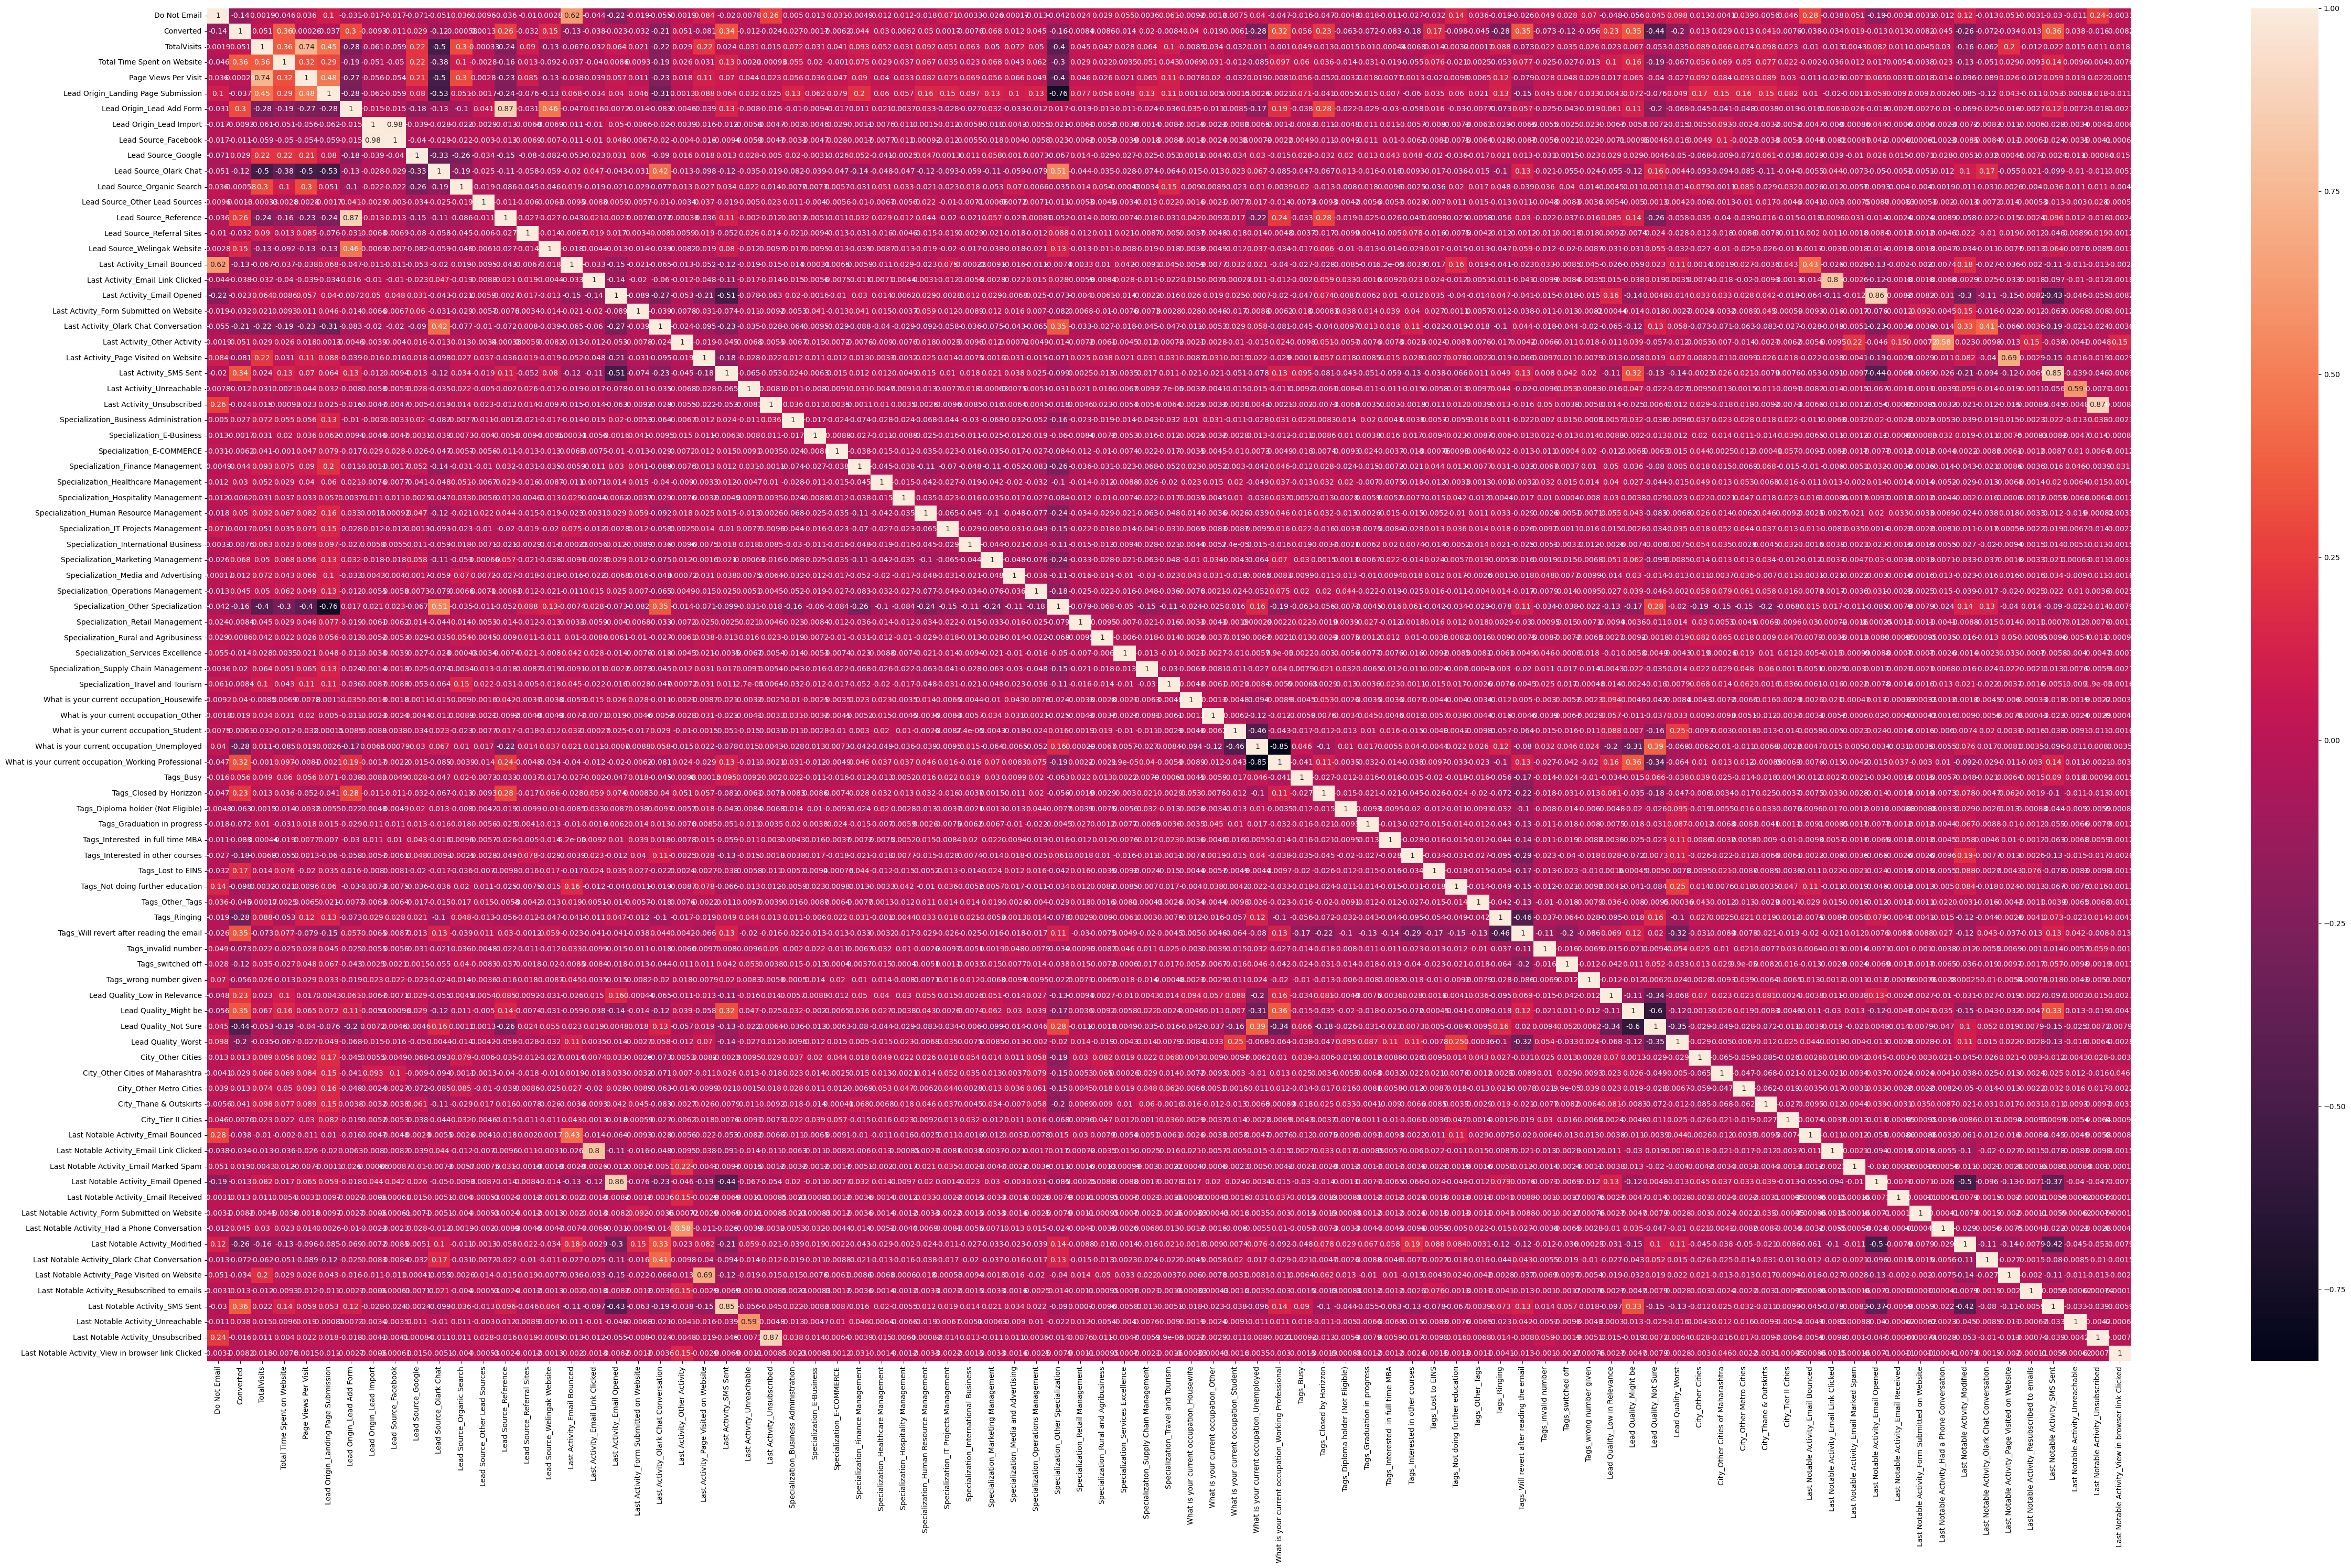

In [51]:
plt.figure(figsize = (50, 30))
sns.heatmap(lead.corr(), annot = True)
plt.tight_layout()
plt.show()

In [52]:
# Dropping some of the highly correlated columns.
X_test = X_test.drop(['Lead Source_Facebook', 'Lead Origin_Lead Import', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed'], axis = 1)

X_train = X_train.drop(['Lead Source_Facebook', 'Lead Origin_Lead Import', 'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Unreachable', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed'], axis = 1)


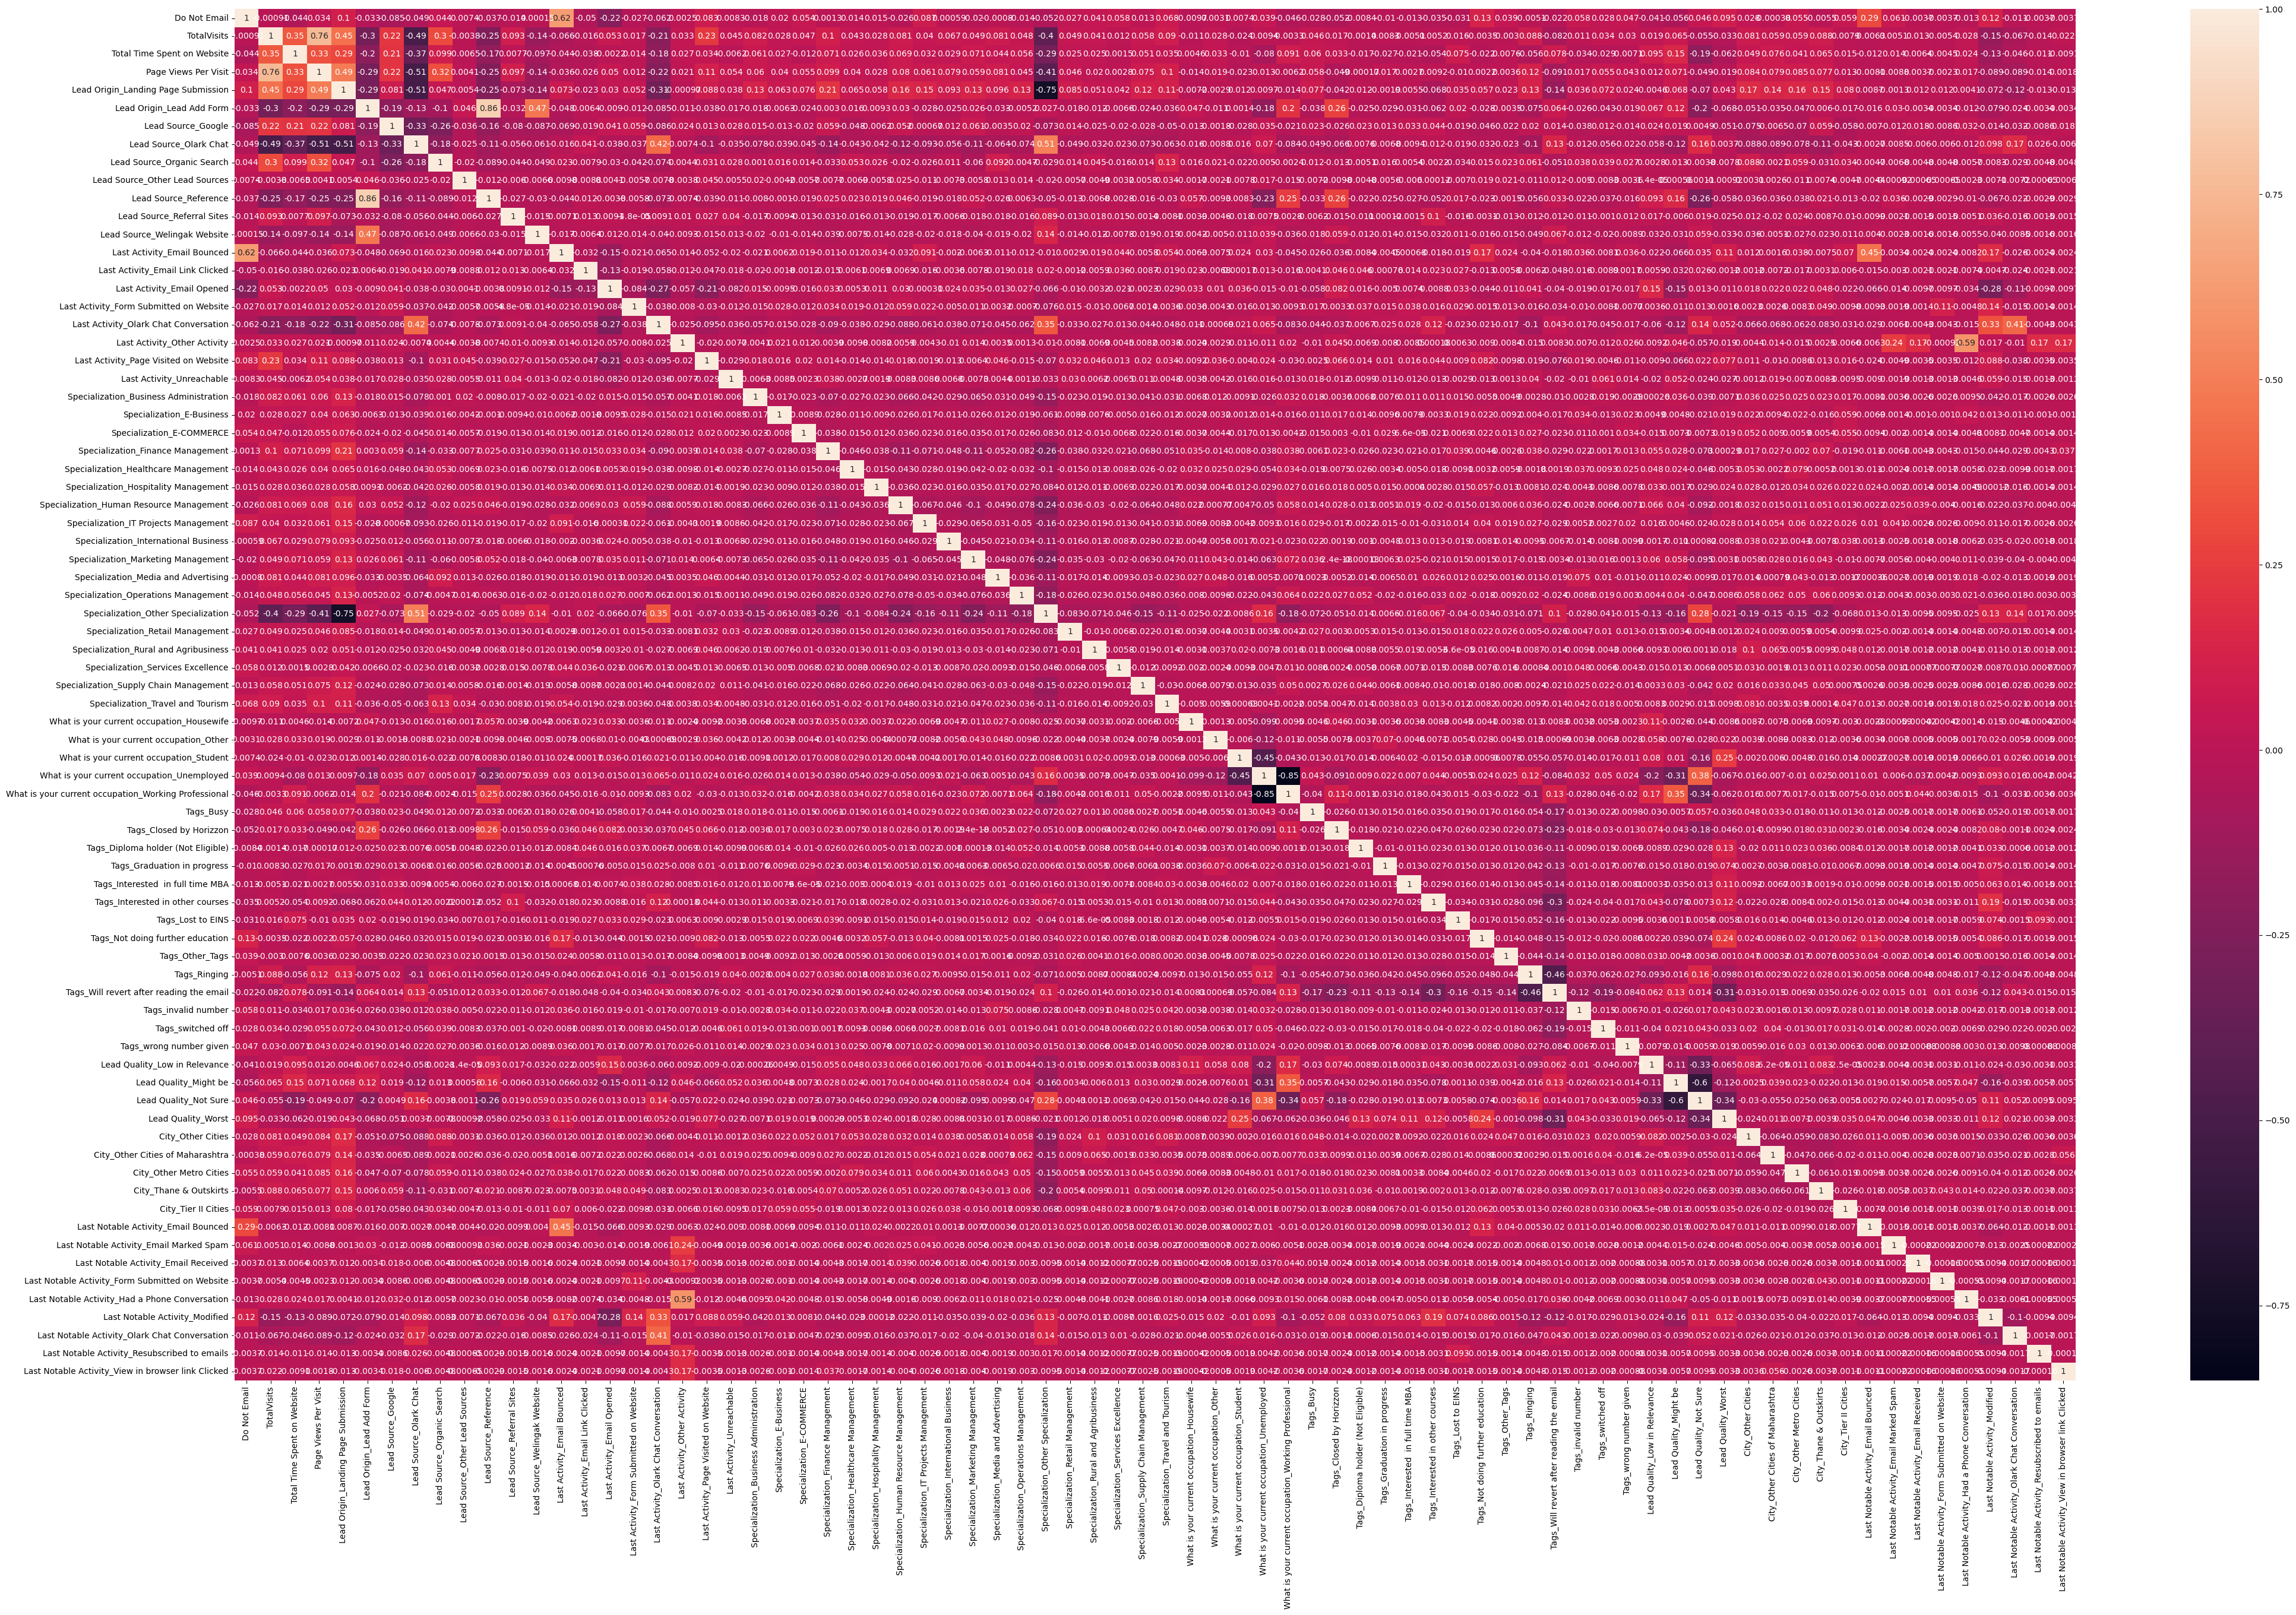

In [53]:
plt.figure(figsize = (50, 30))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

## Model Building

In [54]:
# Logistic Regression Model.

logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           76
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1291.0
Date:                Mon, 23 Oct 2023   Deviance:                       2581.9
Time:                        22:14:38   Pearson chi2:                 3.47e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6041
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.5319      1.737      2.033      0.042       0.128       6.936
Do Not Email                                            -1.4359      0.300     -4.780      0.000      -2.025      -0.847
TotalVisits                                              0.0915      0.085      1.080      0.280      -0.075       0.258
Total Time Spent on Website                              1.1451      0.063     18.274      0.000       1.022       1.268
Page Views Per Visit                                    -0.0970      0.084     -1.150      0.250      -0.262       0.068
Lead Origin_Landing Page Submission                     -1.0581      0.214     -4.955      0.000      -1.477      -0.640
Lead Origin_Lead Add Form                               -0.2074      1.294     -0.160      0.873      -2.745       2.330
Lead Source_Google                                       0.1841      0.149      1.235      0.217      -0.108       0.476
Lead Source_Olark Chat                                   1.0909      0.218      4.994      0.000       0.663       1.519
Lead Source_Organic Search                               0.1115      0.203      0.550      0.583      -0.286       0.509
Lead Source_Other Lead Sources                           0.8177      0.816      1.002      0.317      -0.782       2.418
Lead Source_Reference                                    1.8220      1.353      1.347      0.178      -0.830       4.474
Lead Source_Referral Sites                              -0.2284      0.492     -0.465      0.642      -1.192       0.735
Lead Source_Welingak Website                             5.5659      1.498      3.716      0.000       2.630       8.502
Last Activity_Email Bounced                             -1.7710      0.817     -2.167      0.030      -3.373      -0.169
Last Activity_Email Link Clicked                        -2.3468      0.328     -7.151      0.000      -2.990      -1.704
Last Activity_Email Opened                              -1.9539      0.129    -15.114      0.000      -2.207      -1.701
Last Activity_Form Submitted on Website                 -1.1840      0.518     -2.287      0.022      -2.199      -0.169
Last Activity_Olark Chat Conversation                   -1.8872      0.266     -7.090      0.000      -2.409      -1.366
Last Activity_Other Activity                             0.0912      1.153      0.079      0.937      -2.169       2.351
Last Activity_Page Visited on Website                   -1.9023      0.247     -7.708      0.000      -2.386      -1.419
Last Activity_Unreachable                               -0.9084      0.478     -1.900      0.057      -1.845       0.028
Specialization_Business Administration                  -0

## Feature Selection Using RFE

In [55]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 125)

In [56]:
# We'll use 15 features selected by RFE.
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [57]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False,  True,
        True,  True,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 48),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Other Lead Sources', False, 36),
 ('Lead Source_Reference', False, 50),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 11),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', False, 49),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Unreachable', False, 19),
 ('Specialization_Business Administration', False, 54),
 ('Specialization_E-Business'

In [59]:
col = X_train.columns[rfe.support_]

In [60]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other Lead Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Other Activity', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
   

In [61]:
# Building the model with features selected by RFE.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1734.5
Date:                Mon, 23 Oct 2023   Deviance:                       3469.1
Time:                        22:14:46   Pearson chi2:                 2.53e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5447
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5310      0.201     -2.642      0.008      -0.925      -0.137
Lead Source_Welingak Website                 4.2447      0.729      5.820      0.000       2.815       5.674
Last Activity_Email Bounced                 -2.0358      0.427     -4.773      0.000      -2.872      -1.200
Last Activity_Email Link Clicked            -1.2637      0.301     -4.204      0.000      -1.853      -0.674
Last Activity_Olark Chat Conversation       -1.4581      0.188     -7.773      0.000      -1.826      -1.090
Last Activity_Page Visited on Website       -0.9692      0.192     -5.052      0.000      -1.345      -0.593
Tags_Busy                                    4.2293      0.301     14.064      0.000       3.640       4.819
Tags_Closed by Horizzon                      8.3026      0.770     10.777      0.000       6.793       9.813
Tags_Lost to EINS                            9.1153      0.763     11.941      0.000       7.619      10.611
Tags_Ringing                                -1.1485      0.311     -3.699      0.000      -1.757      -0.540
Tags_Will revert after reading the email     3.8093      0.219     17.397      0.000       3.380       4.238
Tags_invalid number                        -21.3139   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Tags_switched off                           -1.5208      0.564     -2.697      0.007      -2.626      -0.416
Lead Quality_Not Sure                       -3.4743      0.124    -28.002      0.000      -3.717      -3.231
Lead Quality_Worst                          -4.1710      0.777     -5.371      0.000      -5.693      -2.649
Last Notable Activity_Modified              -1.4002      0.106    -13.267      0.000      -1.607      -1.193
============================================================================================================
"""

In [62]:
# Getting the predicted values on the train-set.
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.451157
1012    0.096927
9226    0.001422
4750    0.451157
7987    0.976101
1281    0.963678
2880    0.451157
4971    0.555771
7536    0.963678
1248    0.001422
dtype: float64

In [63]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45115664, 0.09692687, 0.00142234, 0.45115664, 0.97610148,
       0.96367752, 0.45115664, 0.55577119, 0.96367752, 0.00142234])

In [64]:
# Creating a DataFrame with true conversion status and predicted probabilities.
y_train_pred_final = pd.DataFrame({'Convert' : y_train.values, 'Convert_Prob' : y_train_pred})
y_train_pred_final['ProsID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  ProsID
0        0      0.451157    3009
1        0      0.096927    1012
2        0      0.001422    9226
3        1      0.451157    4750
4        1      0.976101    7987

In [65]:
# Creating a new column 'predicted'.
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Convert  Convert_Prob  ProsID  predicted
0        0      0.451157    3009          0
1        0      0.096927    1012          0
2        0      0.001422    9226          0
3        1      0.451157    4750          0
4        1      0.976101    7987          1

In [66]:
# Confusion Matrix.
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted)
print(confusion)

[[3825   80]
 [ 682 1764]]


In [67]:
# Model Accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8800188946622579


## Checking VIF

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12                     Lead Quality_Not Sure  2.97
9   Tags_Will revert after reading the email  1.97
14            Last Notable Activity_Modified  1.89
3      Last Activity_Olark Chat Conversation  1.37
8                               Tags_Ringing  1.37
13                        Lead Quality_Worst  1.14
4      Last Activity_Page Visited on Website  1.13
1                Last Activity_Email Bounced  1.12
6                    Tags_Closed by Horizzon  1.07
5                                  Tags_Busy  1.06
11                         Tags_switched off  1.06
7                          Tags_Lost to EINS  1.05
0               Lead Source_Welingak Website  1.04
2           Last Activity_Email Link Clicked  1.04
10                       Tags_invalid number  1.03

In [69]:
# 'Tags_invalid number' has low VIF value but high p-value. So we'll drop this feature.
col = col.drop('Tags_invalid number', 1)
col

Index(['Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [70]:
# Re-running the model using selected features.
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1737.1
Date:                Mon, 23 Oct 2023   Deviance:                       3474.2
Time:                        22:14:46   Pearson chi2:                 2.55e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5443
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6146      0.199     -3.086      0.002      -1.005      -0.224
Lead Source_Welingak Website                 4.2441      0.729      5.820      0.000       2.815       5.673
Last Activity_Email Bounced                 -2.0319      0.427     -4.761      0.000      -2.868      -1.195
Last Activity_Email Link Clicked            -1.2615      0.301     -4.194      0.000      -1.851      -0.672
Last Activity_Olark Chat Conversation       -1.4581      0.188     -7.770      0.000      -1.826      -1.090
Last Activity_Page Visited on Website       -0.9681      0.192     -5.045      0.000      -1.344      -0.592
Tags_Busy                                    4.3129      0.300     14.396      0.000       3.726       4.900
Tags_Closed by Horizzon                      8.3816      0.770     10.883      0.000       6.872       9.891
Tags_Lost to EINS                            9.1927      0.763     12.048      0.000       7.697      10.688
Tags_Ringing                                -1.0651      0.309     -3.443      0.001      -1.671      -0.459
Tags_Will revert after reading the email     3.8923      0.218     17.892      0.000       3.466       4.319
Tags_switched off                           -1.4374      0.563     -2.552      0.011      -2.541      -0.333
Lead Quality_Not Sure                       -3.4751      0.124    -28.022      0.000      -3.718      -3.232
Lead Quality_Worst                          -4.1547      0.778     -5.339      0.000      -5.680      -2.630
Last Notable Activity_Modified              -1.3956      0.106    -13.226      0.000      -1.602      -1.189
============================================================================================================
"""

In [71]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.450819
1012    0.097157
9226    0.001427
4750    0.450819
7987    0.976047
1281    0.963656
2880    0.450819
4971    0.555587
7536    0.963656
1248    0.001427
dtype: float64

In [72]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.45081871, 0.09715686, 0.00142748, 0.45081871, 0.9760471 ,
       0.96365563, 0.45081871, 0.55558736, 0.96365563, 0.00142748])

In [73]:
y_train_pred_final = pd.DataFrame({'Convert' : y_train.values, 'Convert_Prob' : y_train_pred})
y_train_pred_final['ProsID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  ProsID
0        0      0.450819    3009
1        0      0.097157    1012
2        0      0.001427    9226
3        1      0.450819    4750
4        1      0.976047    7987

In [74]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

Convert  Convert_Prob  ProsID  predicted
0        0      0.450819    3009          0
1        0      0.097157    1012          0
2        0      0.001427    9226          0
3        1      0.450819    4750          0
4        1      0.976047    7987          1

In [75]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted)
print(confusion)

[[3825   80]
 [ 682 1764]]


In [76]:
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8800188946622579


## Metrics Beyond Simply Accuracy

In [77]:
TP = confusion[1,1]   # true positives
TN = confusion[0,0]   # true negatives
FP = confusion[0,1]   # false positives
FN = confusion[1,0]   # false negatives 

In [78]:
# Checking the Sensitivity of our model.
TP / float(TP+FN)

0.7211774325429272

In [79]:
# Calculating the Specificity.
TN / float(TN+FP)

0.9795134443021767

In [80]:
# Calculating False Positive Rate - predicting conversion when customer does not have converted.
print(FP / float(TN+FP))

0.020486555697823303


In [81]:
# Positive Predictive Value.
print(FP / float(TP+FP))

0.04338394793926247


In [82]:
# Negative Predictive Value.
print(TN / float(TN+FN))

0.8486798313734192


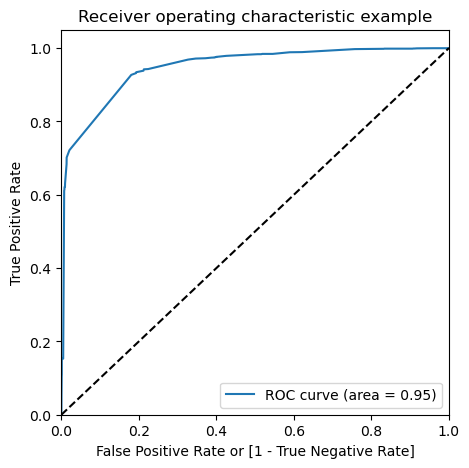

In [83]:
# Defining the function to plot the ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

## Finding Optimal Cutoff Point

In [84]:
# Creating columns with different probability cutoffs.
numbers = [float(x) / 10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Convert  Convert_Prob  ProsID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0        0      0.450819    3009          0    1    1    1    1    1    0   
1        0      0.097157    1012          0    1    0    0    0    0    0   
2        0      0.001427    9226          0    1    0    0    0    0    0   
3        1      0.450819    4750          0    1    1    1    1    1    0   
4        1      0.976047    7987          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    1    1    1    1

In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.747284     0.974652     0.604866
0.2   0.2  0.846796     0.941946     0.787196
0.3   0.3  0.855928     0.933769     0.807170
0.4   0.4  0.860967     0.926819     0.819718
0.5   0.5  0.880019     0.721177     0.979513
0.6   0.6  0.876712     0.701554     0.986428
0.7   0.7  0.873406     0.692559     0.986684
0.8   0.8  0.869942     0.683565     0.986684
0.9   0.9  0.849158     0.623058     0.990781


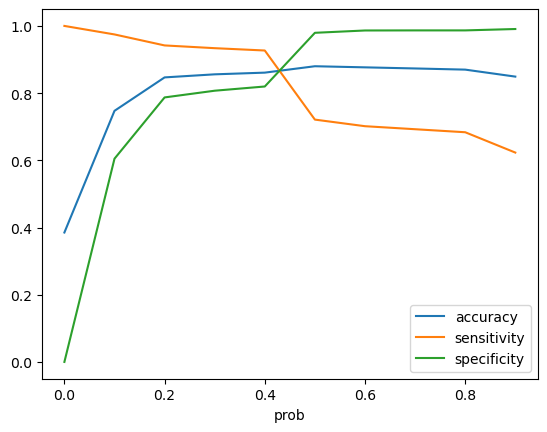

In [86]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

### From the above curve, 0.45 is the optimum point to take it as a cutoff probability.

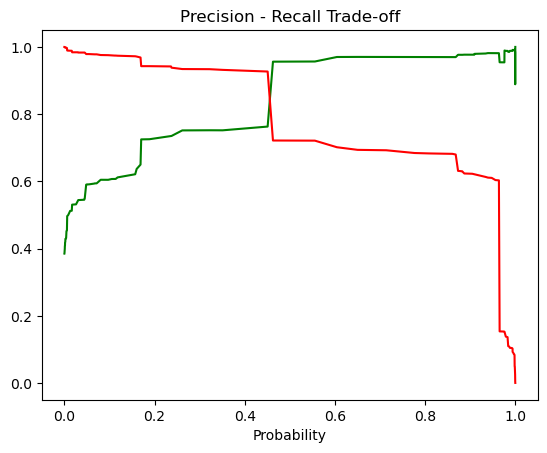

In [87]:
# Plotting a Precision-Recall Tradeoff curve.
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision - Recall Trade-off")
plt.show()

In [88]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.45 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x * 100))
y_train_pred_final.head()

Convert  Convert_Prob  ProsID  Convert_predicted  Lead_Score
0        0      0.450819    3009                  1          45
1        0      0.097157    1012                  0          10
2        0      0.001427    9226                  0           0
3        1      0.450819    4750                  1          45
4        1      0.976047    7987                  1          98

In [89]:
# Getting the predicted values on the test-set.
X_test = X_test[col]
X_test.head()

Lead Source_Welingak Website  Last Activity_Email Bounced  \
3271                             0                            0   
1490                             0                            0   
7936                             0                            0   
4216                             0                            0   
3830                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Olark Chat Conversation  \
3271                                 0                                      0   
1490                                 0                                      0   
7936                                 0                                      0   
4216                                 0                                      0   
3830                                 0                                      0   

      Last Activity_Page Visited on Website  Tags_Busy  \
3271                                      0          0   
1490                                      0          0   
7936                                      0          0   
4216                                      0          0   
3830                                      0          0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
3271                        0                  0             0   
1490                        0                  0             0   
7936                        0                  0             0   
4216                        1                  0             0   
3830                        0                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3271                                         1                  0   
1490                                         1                  0   
7936                                         1                  0   
4216                                         0                  0   
3830                                         1                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
3271                      1                   0   
1490                      0                   0   
7936                      1                   0   
4216                      0                   0   
3830                      1                   0   

      Last Notable Activity_Modified  
3271                               0  
1490                               0  
7936                               0  
4216                               1  
3830                               0

In [90]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [91]:
y_test_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns = ["Convert_Probability"])
y_test_df['ProspectID'] = y_test_df.index

In [92]:
y_predicted_final = pd.concat([y_test_df.reset_index(drop = True), y_test_pred_df.reset_index(drop = True)], axis = 1)
y_predicted_final['final_predicted'] = y_predicted_final.Convert_Probability.map(lambda x: 1 if x > 0.45 else 0)
y_predicted_final['Lead_Score'] = y_predicted_final.Convert_Probability.map(lambda x: round(x * 100))

In [93]:
y_predicted_final.head()

Converted  ProspectID  Convert_Probability  final_predicted  Lead_Score
0          0        3271             0.450819                1          45
1          1        1490             0.963656                1          96
2          0        7936             0.450819                1          45
3          1        4216             0.998293                1         100
4          0        3830             0.450819                1          45

In [94]:
# Final Accuracy.
metrics.accuracy_score(y_predicted_final.Converted, y_predicted_final.final_predicted)

0.8475945648182152

In [95]:
# Final Confusion Matrix
confusion2 = metrics.confusion_matrix(y_predicted_final.Converted, y_predicted_final.final_predicted)
confusion2

array([[1399,  335],
       [  80,  909]], dtype=int64)

In [96]:
TP = confusion[1,1]   # true positives
TN = confusion[0,0]   # true negatives
FP = confusion[0,1]   # false positives
FN = confusion[1,0]   # false negatives 

In [97]:
# Final Sensitivity of our Logistic Regression Model.
TP / float(TP+FN)

0.7211774325429272

In [98]:
# Final Specificity of our Logistic Regression Model.
TN / float(TN+FP)

0.9795134443021767